# Tweets Sentiment Analysis

In [24]:
import pandas as pd
import numpy as np


## Tweets Sentiment Analysis

In [25]:
tweets=pd.read_csv('./data/Twitter/tweets.csv')
tweets.head(10)

,datetime,username,text
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...
2,2022-01-01 23:00:00,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...
3,2022-01-01 23:00:00,robert54177167,If your interested in losing money in 2022 kee...
4,2022-01-01 23:00:00,WorldCoinIndex,Bitcoin price index https://t.co/o7UcHJUhC6 #U...
5,2022-01-01 23:00:00,CommodoreBTC,@JesseKellyDC Money is at the root of every in...
6,2022-01-01 23:00:00,Raybonthird,@nikitabier People want a basis of truth for t...
7,2022-01-01 23:00:00,jhamby,It means the opposite of what they want it to....
8,2022-01-01 23:00:00,AxolotolH,@SirPantsALot2 @fairguinevere @totallynotem_ @...
9,2022-01-01 23:00:00,nyan_lou618,BTC diamond reversal and expected volatility f...


In [26]:
tweets.describe()

,datetime,username,text
count,8173354,8173342,8173342
unique,4330,1038412,6964076
top,2022-02-23 16:00:00,cripto_informe,Consolidation setting up for next level moving...
freq,127753,198778,125729


### Cleaning the text

#### Filter the tweets

In [27]:
tweets_data = tweets.groupby('username').filter(lambda x : len(x)<1000)
print(len(tweets_data))

5711375


#### Remove the noise words and stop words

In [28]:
noise_words = ['free', 'freebitcoin', 'freeminingsoftware', 'freebitco', 'free bitcoin', 'makemoney', 'make money', 'give away','giving away','register', 'pump','join',
          'abtcl', 'tradingtool', 'trading tool', 'residualbitcoin', 'faucet', 'casino',
          'simplefx', 'nitrogensportsbook', 'makeyourownlane', 'bet', 'bitcoinbet', 'webbot', 'win', 'game', 'lottery',
          'bitcoinprice','bitcoin price' , 'mpgvip', 'footballcoin', 'earnbitcoin', 'earn bitcoin',
           'trading', 'price', 'performing currency', 'altcoin', 'fintech', 'pic']

In [29]:
tweets_data = tweets_data[~tweets_data.text.str.contains('|'.join(noise_words))]

In [30]:
print(len(tweets_data))

4755975


#### Clean Text

In [31]:
import sys
import regex as re
from nltk.corpus import stopwords
import string
from string import digits
import contractions
import nltk
import json

from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yujiewang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
file_path = './data/abbreviations.json'

with open(file_path, 'r') as json_file:
    json_data = json.load(json_file)
    abbreviations = json_data['abbreviations']

In [33]:
nltk.download('wordnet')
lemma_sents = []
def lemma(text):
    lemmatizer = nltk.WordNetLemmatizer()
    lemma_sent=[lemmatizer.lemmatize(word) for word in text]
    lemma_text=' '.join(lemma_sent)
    return lemma_text

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yujiewang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [35]:
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens=[convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

In [36]:
nltk.download('punkt')
def remove_url(text):
    # removal of urls
    url=re.compile(r'https?://\S+|www\.\S+')
    text=url.sub(r'',text)
    # removal of html tags
    html=re.compile('<.*?>')
    text=html.sub(r'',text)
    return text

[nltk_data] Downloading package punkt to /Users/yujiewang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
#Clean the text
tweets_data['text_clean'] = tweets_data['text'].map(remove_url)

In [38]:
nltk.download('onw-1.4')
nltk.download('averaged_percepton_tagger')

[nltk_data] Error loading onw-1.4: Package 'onw-1.4' not found in
[nltk_data]     index
[nltk_data] Error loading averaged_percepton_tagger: Package
[nltk_data]     'averaged_percepton_tagger' not found in index


False

In [39]:
def text_clean(text):
    # Expand contractions
    try:
        text = " ".join([contractions.fix(word) for word in str(text).split()])
    except:
        print(text)

    # Handle slang and/or acroyms
    text = convert_abbrev_in_text(text)

    # Remove ticker symbols
    ticker_pattern = r'\$\w+'
    text = re.sub(ticker_pattern, '', text)

    # removal of puctuation
    text=text.translate(str.maketrans('','',string.punctuation))
    # removal of digits
    text=text.translate(str.maketrans('', '', digits))
    # removal of whitespace
    text=" ".join(text.split())

    # Tokenization
    text = nltk.word_tokenize(text)

    # Wordnet lemmatization
    text = lemma(text)

    # removal of stopwords
    stopword=stopwords.words('english')
    text=" ".join([word for word in str(text).split() if word.lower() not in stopword])

    # removal of unneccesary data (non-letter)
    un_sen=re.compile(r'[^a-zA-Z\s]')
    text=un_sen.sub(r'',text)
    return text.lower()

In [41]:
#Clean the text
tweets_data['text_clean'] = tweets_data['text_clean'].map(text_clean)

@MMCrypto İ BET BİTCOİN WİLL BE BELOW 70K WİTHİN 2022 AND WE WİLL SEE MİNİMUM 20-25K RANGE
$BTC breaking the downtrend on the daily chart and also getting over the İchimoku clouds. The Only resistance that is left is the 200EMA. Let's see where the daily candle will close today. NFA. #TMRAnalysis #BTC #Bitcoin 
#SUPER#SUPER COİN#BİTCOİN#ETHEREUM 🔥🔥🔥🔥🚀🚀🚀
@MrBigWhaleREAL meet us, experience the difference, we are the future #vinu #VİNU #Bitcoin #ElonMusk 
@Bybit_Official @TRVL @Stepnofficial @InsurAce_io @genso_meta @MobLandHQ We are excited to see #VINU on the list, When will you include us on the list, We are waiting for you as the #VINU family #Bybit #vinu #Bitcoin  #BTc  #VİNU @ElemontCapital @VitaInuCoin #Metaverse #cryptocurrency #newlisting @Bybit_Official 
get ready to fly my family #VİNU @VitaInuCoin #Bitcoin #elonMusk 
@gate_io hello #Gateio when will you list us #VİNU @VitaInuCoin #BTC   #Bitcoin #Gateio @gate_io 
@HuobiGlobal hello #huobi when will you list us #VİNU @VitaInuC

In [42]:
tweets_data.head(100)

,datetime,username,text,text_clean
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...,mot tokens latoken airdrop maybe bitcoin crypt...
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...,mara bitcoin exposure top trade q
2,2022-01-01 23:00:00,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...,every time bell rings titano make money bitcoin
3,2022-01-01 23:00:00,robert54177167,If your interested in losing money in 2022 kee...,interested losing money keep money bank accoun...
5,2022-01-01 23:00:00,CommodoreBTC,@JesseKellyDC Money is at the root of every in...,jessekellydc money root every institution bitc...
...,...,...,...,...
128,2022-01-01 23:00:00,Criticalinfo1,Bitcoin sees ‘non-stop’ end-of-year buying as ...,bitcoin see nonstop endofyear buying k btc l...
129,2022-01-01 23:00:00,Salansar1,The #Turkish🇹🇷 #Lira is not a normal currency ...,turkish lira normal currency anymore thanks ha...
130,2022-01-01 23:00:00,santisiri,@MartyBent @gladstein because bitcoin has the ...,martybent gladstein bitcoin ha le censorship r...
131,2022-01-01 23:00:00,jungIejosh,"@PeterSchiff You all heard Peter, buy #bitcoin",peterschiff heard peter buy bitcoin


#### Keep tweets which length is between 5 and 60 words

Text(0.5, 1.0, 'histogram of number of words in tweet')

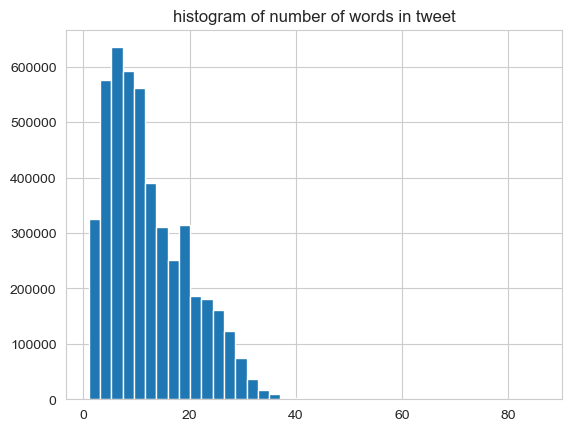

In [45]:
import matplotlib.pyplot as plt
plt.hist(tweets_data['text_clean'].apply(lambda x:x.split(' ')).apply(len), bins=40)
plt.title('histogram of number of words in tweet')

In [46]:
# keep tweets which length is between 5 and 60 words
def drop_by_length(text, low, high):
  l = len(text.split(' '))
  if (l>=low) and (l<=high):
    return True
  else:
    return False

In [47]:
tweets_data=tweets_data[tweets_data['text_clean'].apply(lambda x: drop_by_length(x,6,60))]

In [48]:
print(len(tweets_data))

3854553


In [49]:
tweets_data=tweets_data.drop_duplicates(subset='text_clean').reset_index(drop=True)

In [50]:
tweets_data.head(10)

,datetime,username,text,text_clean
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...,mot tokens latoken airdrop maybe bitcoin crypt...
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...,mara bitcoin exposure top trade q
2,2022-01-01 23:00:00,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...,every time bell rings titano make money bitcoin
3,2022-01-01 23:00:00,robert54177167,If your interested in losing money in 2022 kee...,interested losing money keep money bank accoun...
4,2022-01-01 23:00:00,CommodoreBTC,@JesseKellyDC Money is at the root of every in...,jessekellydc money root every institution bitc...
5,2022-01-01 23:00:00,Raybonthird,@nikitabier People want a basis of truth for t...,nikitabier people want basis truth interaction...
6,2022-01-01 23:00:00,AxolotolH,@SirPantsALot2 @fairguinevere @totallynotem_ @...,sirpantsalot fairguinevere totallynotem llhall...
7,2022-01-01 23:00:00,joybowtie,if we ever get to the point where we start pay...,ever get point start paying rent bitcoin k
8,2022-01-01 23:00:00,nft_Vis,In 2021 here’s what I accomplished:\n\n1. Buil...,accomplished built needed community center rur...
9,2022-01-01 23:00:00,memecoininsider,Happy New Year everyone! 2022 is the year of f...,happy new year everyone year focus focusing en...


In [51]:
print(len(tweets_data))

3324865


In [54]:
def remove_white_space(text):
    return " ".join(text.split())

In [55]:
tweets_data['text_clean']=tweets_data['text_clean'].apply(lambda x: remove_white_space(x))
tweets_data.head(100)

,datetime,username,text,text_clean
0,2022-01-01 23:00:00,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...,mot tokens latoken airdrop maybe bitcoin crypt...
1,2022-01-01 23:00:00,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...,mara bitcoin exposure top trade q
2,2022-01-01 23:00:00,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...,every time bell rings titano make money bitcoin
3,2022-01-01 23:00:00,robert54177167,If your interested in losing money in 2022 kee...,interested losing money keep money bank accoun...
4,2022-01-01 23:00:00,CommodoreBTC,@JesseKellyDC Money is at the root of every in...,jessekellydc money root every institution bitc...
...,...,...,...,...
95,2022-01-01 23:00:00,thebitcoinwin,Check Our Skeleton Brawlies Premium NFTs Colle...,check skeleton brawlies premium nfts collectio...
96,2022-01-01 23:00:00,gomishaco,"the miner - 2022 spray paint, paint pen and ac...",miner spray paint paint pen acrylic canvas x c...
97,2022-01-01 23:00:00,planche_btc,@Xirallics @mcbyrne @mozilla You don’t need a ...,xirallics mcbyrne mozilla need gpu surf porn a...
98,2022-01-01 23:00:00,LameNichol,Contributors’ Convictions: A Bitcoin Legacy Le...,contributors convictions bitcoin legacy letter


In [58]:
tweets_text=tweets_data.drop(columns=['username','text'])

In [59]:
tweets_text

,datetime,text_clean
0,2022-01-01 23:00:00,mot tokens latoken airdrop maybe bitcoin crypt...
1,2022-01-01 23:00:00,mara bitcoin exposure top trade q
2,2022-01-01 23:00:00,every time bell rings titano make money bitcoin
3,2022-01-01 23:00:00,interested losing money keep money bank accoun...
4,2022-01-01 23:00:00,jessekellydc money root every institution bitc...
...,...,...
3324860,2022-06-30 00:00:00,retrotechnoir think bitcoin people would like ...
3324861,2022-06-30 00:00:00,circle launch eurobacked stablecoin euroc bitc...
3324862,2022-06-30 00:00:00,btcusd bullish macd crossover alert interval e...
3324863,2022-06-30 00:00:00,btcarchive really bitcoin run without internet...


### Sentiment Analysis

#### VADER

In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

In [61]:
analyzer = SentimentIntensityAnalyzer()
compound = []
pos=[]
neu=[]
neg=[]
for i,s in enumerate(tqdm(tweets_text['text_clean'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
    pos.append(vs['pos'])
    neu.append(vs['neu'])
    neg.append(vs['neg'])
tweets_text["compound"] = compound
tweets_text['pos']=pos
tweets_text['neu']=neu
tweets_text['neg']=neg
tweets_text.head(100)

100%|██████████| 3324865/3324865 [02:33<00:00, 21598.73it/s]


,datetime,text_clean,compound,pos,neu,neg
0,2022-01-01 23:00:00,mot tokens latoken airdrop maybe bitcoin crypt...,0.0000,0.000,1.000,0.000
1,2022-01-01 23:00:00,mara bitcoin exposure top trade q,0.2023,0.265,0.735,0.000
2,2022-01-01 23:00:00,every time bell rings titano make money bitcoin,0.0000,0.000,1.000,0.000
3,2022-01-01 23:00:00,interested losing money keep money bank accoun...,0.8360,0.419,0.447,0.134
4,2022-01-01 23:00:00,jessekellydc money root every institution bitc...,0.5106,0.231,0.769,0.000
...,...,...,...,...,...,...
95,2022-01-01 23:00:00,check skeleton brawlies premium nfts collectio...,0.0000,0.000,1.000,0.000
96,2022-01-01 23:00:00,miner spray paint paint pen acrylic canvas x c...,0.0000,0.000,1.000,0.000
97,2022-01-01 23:00:00,xirallics mcbyrne mozilla need gpu surf porn a...,0.2263,0.119,0.881,0.000
98,2022-01-01 23:00:00,contributors convictions bitcoin legacy letter,0.0000,0.000,1.000,0.000


#### TextBlob

In [62]:
# Textblob
from textblob import TextBlob

# create a function to get subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [63]:
# create two new columns called "Subjectivity" & "Polarity"
tweets_text['subjectivity'] = tweets_text['text_clean'].apply(getSubjectivity)
tweets_text['polarity'] = tweets_text['text_clean'].apply(getPolarity)

In [68]:
tweets_text.head(100)

,datetime,text_clean,compound,pos,neu,neg,subjectivity,polarity
0,2022-01-01 23:00:00,mot tokens latoken airdrop maybe bitcoin crypt...,0.0000,0.000,1.000,0.000,0.000000,0.000000
1,2022-01-01 23:00:00,mara bitcoin exposure top trade q,0.2023,0.265,0.735,0.000,0.500000,0.500000
2,2022-01-01 23:00:00,every time bell rings titano make money bitcoin,0.0000,0.000,1.000,0.000,0.000000,0.000000
3,2022-01-01 23:00:00,interested losing money keep money bank accoun...,0.8360,0.419,0.447,0.134,0.703333,0.356667
4,2022-01-01 23:00:00,jessekellydc money root every institution bitc...,0.5106,0.231,0.769,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
95,2022-01-01 23:00:00,check skeleton brawlies premium nfts collectio...,0.0000,0.000,1.000,0.000,0.000000,0.000000
96,2022-01-01 23:00:00,miner spray paint paint pen acrylic canvas x c...,0.0000,0.000,1.000,0.000,0.000000,0.000000
97,2022-01-01 23:00:00,xirallics mcbyrne mozilla need gpu surf porn a...,0.2263,0.119,0.881,0.000,0.100000,0.300000
98,2022-01-01 23:00:00,contributors convictions bitcoin legacy letter,0.0000,0.000,1.000,0.000,0.000000,0.000000


#### PySentiment2

In [86]:
import pysentiment2 as ps

In [104]:
sen=ps.LM()
def get_sentiment_score(text):
    tokens = sen.tokenize(text)
    score = sen.get_score(tokens)
    sum_score=score['Positive']+score['Negative']
    if sum_score==0:
        sum_score=1
    final_score=(score['Positive']-score['Negative'])/sum_score
    return final_score

In [105]:
tweets_text['pysenti_score']=tweets_text['text_clean'].apply(get_sentiment_score)

In [106]:
tweets_text.head(100)

,datetime,text_clean,compound,pos,neu,neg,subjectivity,polarity,pysenti_score
0,2022-01-01 23:00:00,mot tokens latoken airdrop maybe bitcoin crypt...,0.0000,0.000,1.000,0.000,0.000000,0.000000,0.0
1,2022-01-01 23:00:00,mara bitcoin exposure top trade q,0.2023,0.265,0.735,0.000,0.500000,0.500000,0.0
2,2022-01-01 23:00:00,every time bell rings titano make money bitcoin,0.0000,0.000,1.000,0.000,0.000000,0.000000,0.0
3,2022-01-01 23:00:00,interested losing money keep money bank accoun...,0.8360,0.419,0.447,0.134,0.703333,0.356667,-1.0
4,2022-01-01 23:00:00,jessekellydc money root every institution bitc...,0.5106,0.231,0.769,0.000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
95,2022-01-01 23:00:00,check skeleton brawlies premium nfts collectio...,0.0000,0.000,1.000,0.000,0.000000,0.000000,0.0
96,2022-01-01 23:00:00,miner spray paint paint pen acrylic canvas x c...,0.0000,0.000,1.000,0.000,0.000000,0.000000,0.0
97,2022-01-01 23:00:00,xirallics mcbyrne mozilla need gpu surf porn a...,0.2263,0.119,0.881,0.000,0.100000,0.300000,0.0
98,2022-01-01 23:00:00,contributors convictions bitcoin legacy letter,0.0000,0.000,1.000,0.000,0.000000,0.000000,-1.0


In [107]:
tweets_text.to_csv('./data/Twitter/total_tweets_sentiment_score.csv')

### Do not remove the neutral score

In [108]:
tweets_score= pd.DataFrame(columns=['datetime','compound','polarity','subjectivity'])
tweets_text['datetime']=pd.to_datetime(tweets_text['datetime'])
# Grouping by datetime and calculating mean sentiment score
compound_grouped_data = tweets_text.groupby('datetime')['compound'].mean()
tweets_score['compound']=compound_grouped_data

polarity_data=tweets_text.groupby('datetime')['polarity'].mean()
subjectivity_data=tweets_text.groupby('datetime')['subjectivity'].mean()

tweets_score['polarity']=polarity_data
tweets_score['subjectivity']=subjectivity_data

In [109]:
compound_grouped_data

datetime
2022-01-01 00:00:00    0.228459
2022-01-01 01:00:00    0.235804
2022-01-01 02:00:00    0.216377
2022-01-01 03:00:00    0.254585
2022-01-01 04:00:00    0.199023
                         ...   
2022-06-30 19:00:00    0.097033
2022-06-30 20:00:00    0.096938
2022-06-30 21:00:00    0.112159
2022-06-30 22:00:00    0.104823
2022-06-30 23:00:00    0.097806
Name: compound, Length: 4318, dtype: float64

In [110]:
polarity_data

datetime
2022-01-01 00:00:00    0.127819
2022-01-01 01:00:00    0.115225
2022-01-01 02:00:00    0.094649
2022-01-01 03:00:00    0.124391
2022-01-01 04:00:00    0.106416
                         ...   
2022-06-30 19:00:00    0.062959
2022-06-30 20:00:00    0.049762
2022-06-30 21:00:00    0.054471
2022-06-30 22:00:00    0.061164
2022-06-30 23:00:00    0.061618
Name: polarity, Length: 4318, dtype: float64

In [111]:
subjectivity_data

datetime
2022-01-01 00:00:00    0.399377
2022-01-01 01:00:00    0.380319
2022-01-01 02:00:00    0.391375
2022-01-01 03:00:00    0.376654
2022-01-01 04:00:00    0.405293
                         ...   
2022-06-30 19:00:00    0.339059
2022-06-30 20:00:00    0.366837
2022-06-30 21:00:00    0.355057
2022-06-30 22:00:00    0.362953
2022-06-30 23:00:00    0.358823
Name: subjectivity, Length: 4318, dtype: float64

In [102]:
tweets_score.drop(columns=['datetime'],inplace=True)

In [103]:
tweets_score

,compound,polarity,subjectivity
datetime,,,
2022-01-01 00:00:00,0.228459,0.127819,0.399377
2022-01-01 01:00:00,0.235804,0.115225,0.380319
2022-01-01 02:00:00,0.216377,0.094649,0.391375
2022-01-01 03:00:00,0.254585,0.124391,0.376654
2022-01-01 04:00:00,0.199023,0.106416,0.405293
...,...,...,...
2022-06-30 19:00:00,0.097033,0.062959,0.339059
2022-06-30 20:00:00,0.096938,0.049762,0.366837
2022-06-30 21:00:00,0.112159,0.054471,0.355057


### Remove the netural score

In [112]:
tweets_text_filter=tweets_text[tweets_text['compound'] != 0]

In [113]:
tweets_text_filter

,datetime,text_clean,compound,pos,neu,neg,subjectivity,polarity,pysenti_score
1,2022-01-01 23:00:00,mara bitcoin exposure top trade q,0.2023,0.265,0.735,0.000,0.500000,0.500000,0.0
3,2022-01-01 23:00:00,interested losing money keep money bank accoun...,0.8360,0.419,0.447,0.134,0.703333,0.356667,-1.0
4,2022-01-01 23:00:00,jessekellydc money root every institution bitc...,0.5106,0.231,0.769,0.000,0.000000,0.000000,0.0
5,2022-01-01 23:00:00,nikitabier people want basis truth interaction...,-0.4019,0.266,0.475,0.259,0.644444,-0.011111,1.0
8,2022-01-01 23:00:00,accomplished built needed community center rur...,0.5994,0.164,0.836,0.000,0.233333,0.087500,1.0
...,...,...,...,...,...,...,...,...,...
3324859,2022-06-30 00:00:00,bull bear support love volmex change bitcoin e...,0.7845,0.434,0.566,0.000,0.600000,0.500000,0.0
3324860,2022-06-30 00:00:00,retrotechnoir think bitcoin people would like ...,0.7506,0.310,0.615,0.075,0.547619,0.114286,0.0
3324862,2022-06-30 00:00:00,btcusd bullish macd crossover alert interval e...,0.5267,0.173,0.827,0.000,0.000000,0.000000,-1.0
3324863,2022-06-30 00:00:00,btcarchive really bitcoin run without internet...,-0.1531,0.085,0.806,0.109,0.287500,0.062500,-1.0


In [114]:
filter_tweets_score= pd.DataFrame(columns=['datetime','compound','polarity','subjectivity'])
tweets_text_filter['datetime']=pd.to_datetime(tweets_text_filter['datetime'])
# Grouping by datetime and calculating mean sentiment score
compound_grouped_data = tweets_text_filter.groupby('datetime')['compound'].mean()
filter_tweets_score['compound']=compound_grouped_data

polarity_data=tweets_text_filter.groupby('datetime')['polarity'].mean()
subjectivity_data=tweets_text_filter.groupby('datetime')['subjectivity'].mean()

filter_tweets_score['polarity']=polarity_data
filter_tweets_score['subjectivity']=subjectivity_data

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_13826/975353919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_text_filter['datetime']=pd.to_datetime(tweets_text_filter['datetime'])


In [115]:
filter_tweets_score.drop(columns=['datetime'],inplace=True)

In [116]:
filter_tweets_score

,compound,polarity,subjectivity
datetime,,,
2022-01-01 00:00:00,0.294186,0.156530,0.464577
2022-01-01 01:00:00,0.315843,0.140626,0.455090
2022-01-01 02:00:00,0.273377,0.113804,0.440913
2022-01-01 03:00:00,0.323687,0.148573,0.436693
2022-01-01 04:00:00,0.258454,0.127924,0.469470
...,...,...,...
2022-06-30 19:00:00,0.129110,0.071686,0.391262
2022-06-30 20:00:00,0.123428,0.055231,0.417231
2022-06-30 21:00:00,0.145313,0.063928,0.405763


In [117]:
tweets_score.to_csv('./data/Twitter/tweets_score.csv')

In [118]:
filter_tweets_score.to_csv('./data/Twitter/filter_tweets_score.csv')